# Perceptron example
A simple example demonstrating linear classification by a perceptron

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

Use `make_blobs` to create two sets of points `data`, with centers at $(1.1,3)$ with `labels`$=0$ and $(4.5,6.9)$ with `labels`$=1$.  The first set of points have 100 elements, the second, 300. The standard deviation `cluster_std` controls the tightness of each cluster.

In [15]:
data, labels = make_blobs(n_samples=[100,30000], 
                             centers=([1.1, 3], [4.0, 6.9]), 
                             cluster_std=1.1,
                             random_state=0)

Now visualize by plotting the points, use red for 0 and blue for 1

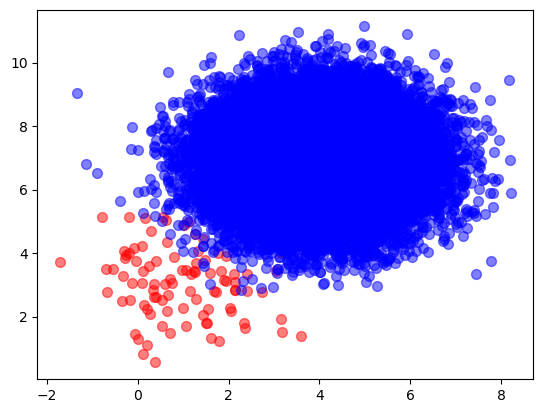

In [16]:
colours = ('red', 'blue')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(data[labels==n_class][:, 0], 
               data[labels==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class),alpha=0.5)
    

Do a train-test split of the data.

In [17]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data, 
                            labels,
                            test_size=0.2)

X_train, X_test, y_train, y_test = datasets

Use `Perceptron` from `sklearn` to train.

In [18]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42)
p.fit(X_train, y_train)
w = p.coef_
w0 = p.intercept_

In [19]:
print(w)
print(w0)

[[10.80793355 12.51725046]]
[-65.]


See how well we do by visualizing the training set with the decision boundary.

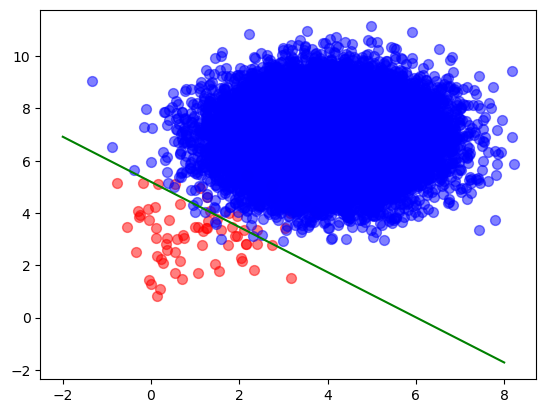

In [20]:
colours = ('red', 'blue')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(X_train[y_train==n_class][:, 0], 
               X_train[y_train==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class),
               alpha=0.5)

xx = np.linspace(-2,8)
yy = - w[:,0]/w[:,1]*xx - w0/w[:,1]
plt.plot(xx,yy,color="green")
plt.show()

In [21]:
ypred = p.predict(X_train)
from sklearn import metrics
print("confusion matrix")
print(metrics.confusion_matrix(y_train,ypred))

confusion matrix
[[   56    16]
 [    7 24001]]


See how well we do with the test data.

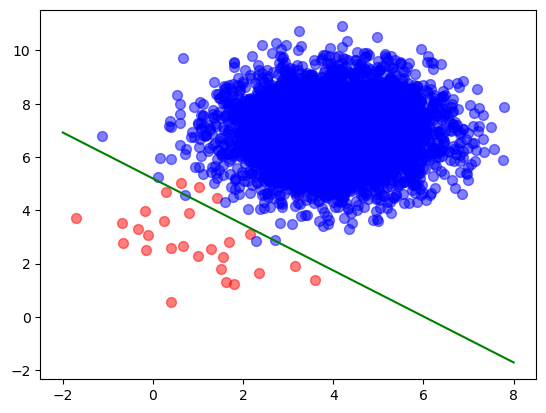

In [22]:
colours = ('red', 'blue')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(X_test[y_test==n_class][:, 0], 
               X_test[y_test==n_class][:, 1], 
               c=colours[n_class], 
               s=50, 
               label=str(n_class),
               alpha=0.5)

xx = np.linspace(-2,8)
yy = - w[:,0]/w[:,1]*xx - w0/w[:,1]
plt.plot(xx,yy,color="green")
plt.show()

In [23]:
print("Training score", p.score(X_train,y_train))
print("Testing score", p.score(X_test,y_test))

Training score 0.9990448504983389
Testing score 0.9991694352159468


# Your turn

This is too easy a problem.  Let's examine how the model behaves when you change the data.

1. Make the problem more difficult by imbalancing the data with `n_samples` and/or increasing `cluster_std`
2. Use `sklearn` `svm` and repeat the experiment above.  Choose `svm.SVC(kernel = 'linear')` when creating the model.

Record your findings.